In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df = pd.read_excel("/Users/luolan/Desktop/statistic_id1008102_garmin-quarterly-revenue-by-segment-2017-2023.xlsx")
df.head()

,Time,Fitness,Outdoor,Aviation
0,1Q '17,137.83,115.88,122.87
1,2Q '17,181.02,194.78,124.06
2,3Q '17,167.15,184.94,124.63
3,4Q '17,276.20,203.28,129.80
4,1Q '18,166.04,144.26,145.71


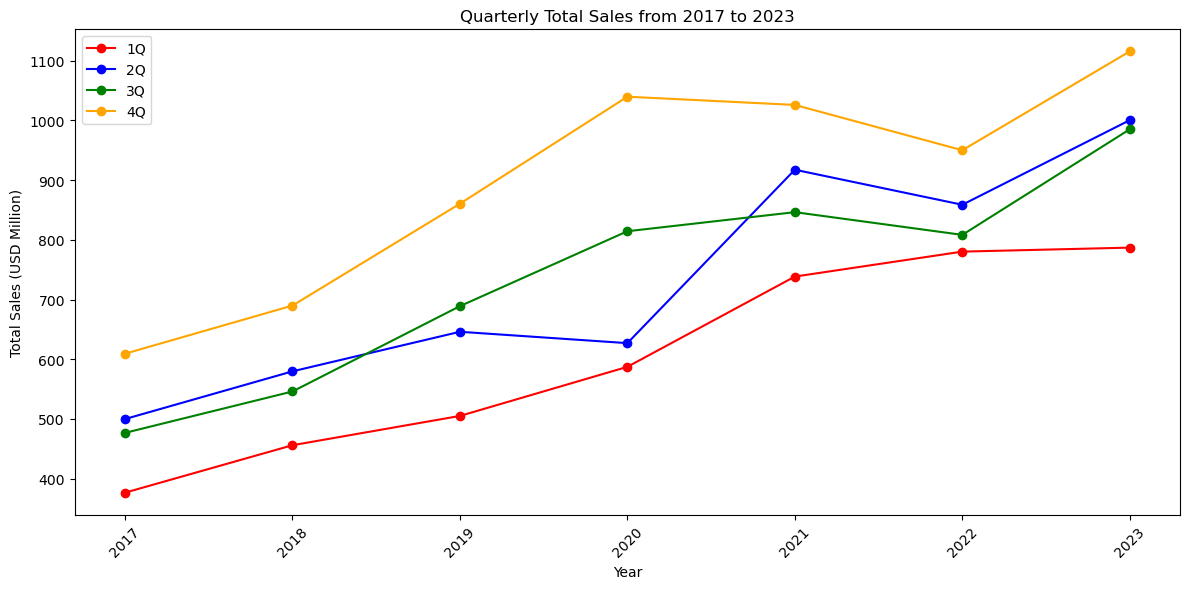

In [5]:
df['Year'] = df['Time'].apply(lambda x: '20' + x[-2:])
df['Quarter'] = df['Time'].apply(lambda x: x[:2])

df['Total Sales'] = df[['Fitness', 'Outdoor', 'Aviation']].sum(axis=1)

quarterly_sales = df.groupby(['Year', 'Quarter'])['Total Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))

quarter_color_mapping = {
    '1Q': 'red',  
    '2Q': 'blue',  
    '3Q': 'green',  
    '4Q': 'orange'  
}


for quarter, color in quarter_color_mapping.items():
    subset = quarterly_sales[quarterly_sales['Quarter'] == quarter]
    plt.plot(subset['Year'], subset['Total Sales'], marker="o", linestyle="-", color=color, label=quarter)


plt.xlabel('Year')
plt.ylabel('Total Sales (USD Million)')
plt.title('Quarterly Total Sales from 2017 to 2023')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()


plt.show()
